![](../images/32_ways_to_pull_repos_into_LLM_context/thumbnail.png)

Good context is key when working with LLMs, no matter if you're coding, writing, planning, problem solving, and what not. The LLM needs to know your context to you help you effectively.

This guide will explore different ways one can pull a GitHub repo or a local repo in particular into a format LLMs can use.

## GitHubq

GitHubq is a web service from [Answer.Ai](https://www.answer.ai/) that allows you to easily make GitHub repos available as context for LLMs. The basic way to use the service is to change `github.com` to `githubq.com`.

![Viewing the Shell Sage GitHub repo as LLM context](1.png)

You can change what you get back with various parameters. For instance,

- `exts=py` returns only files ending with `.py`
- `sigs_only=True` returns only function signatures and their docstrings.


![Only Python files with function signatures are visible](2.png)

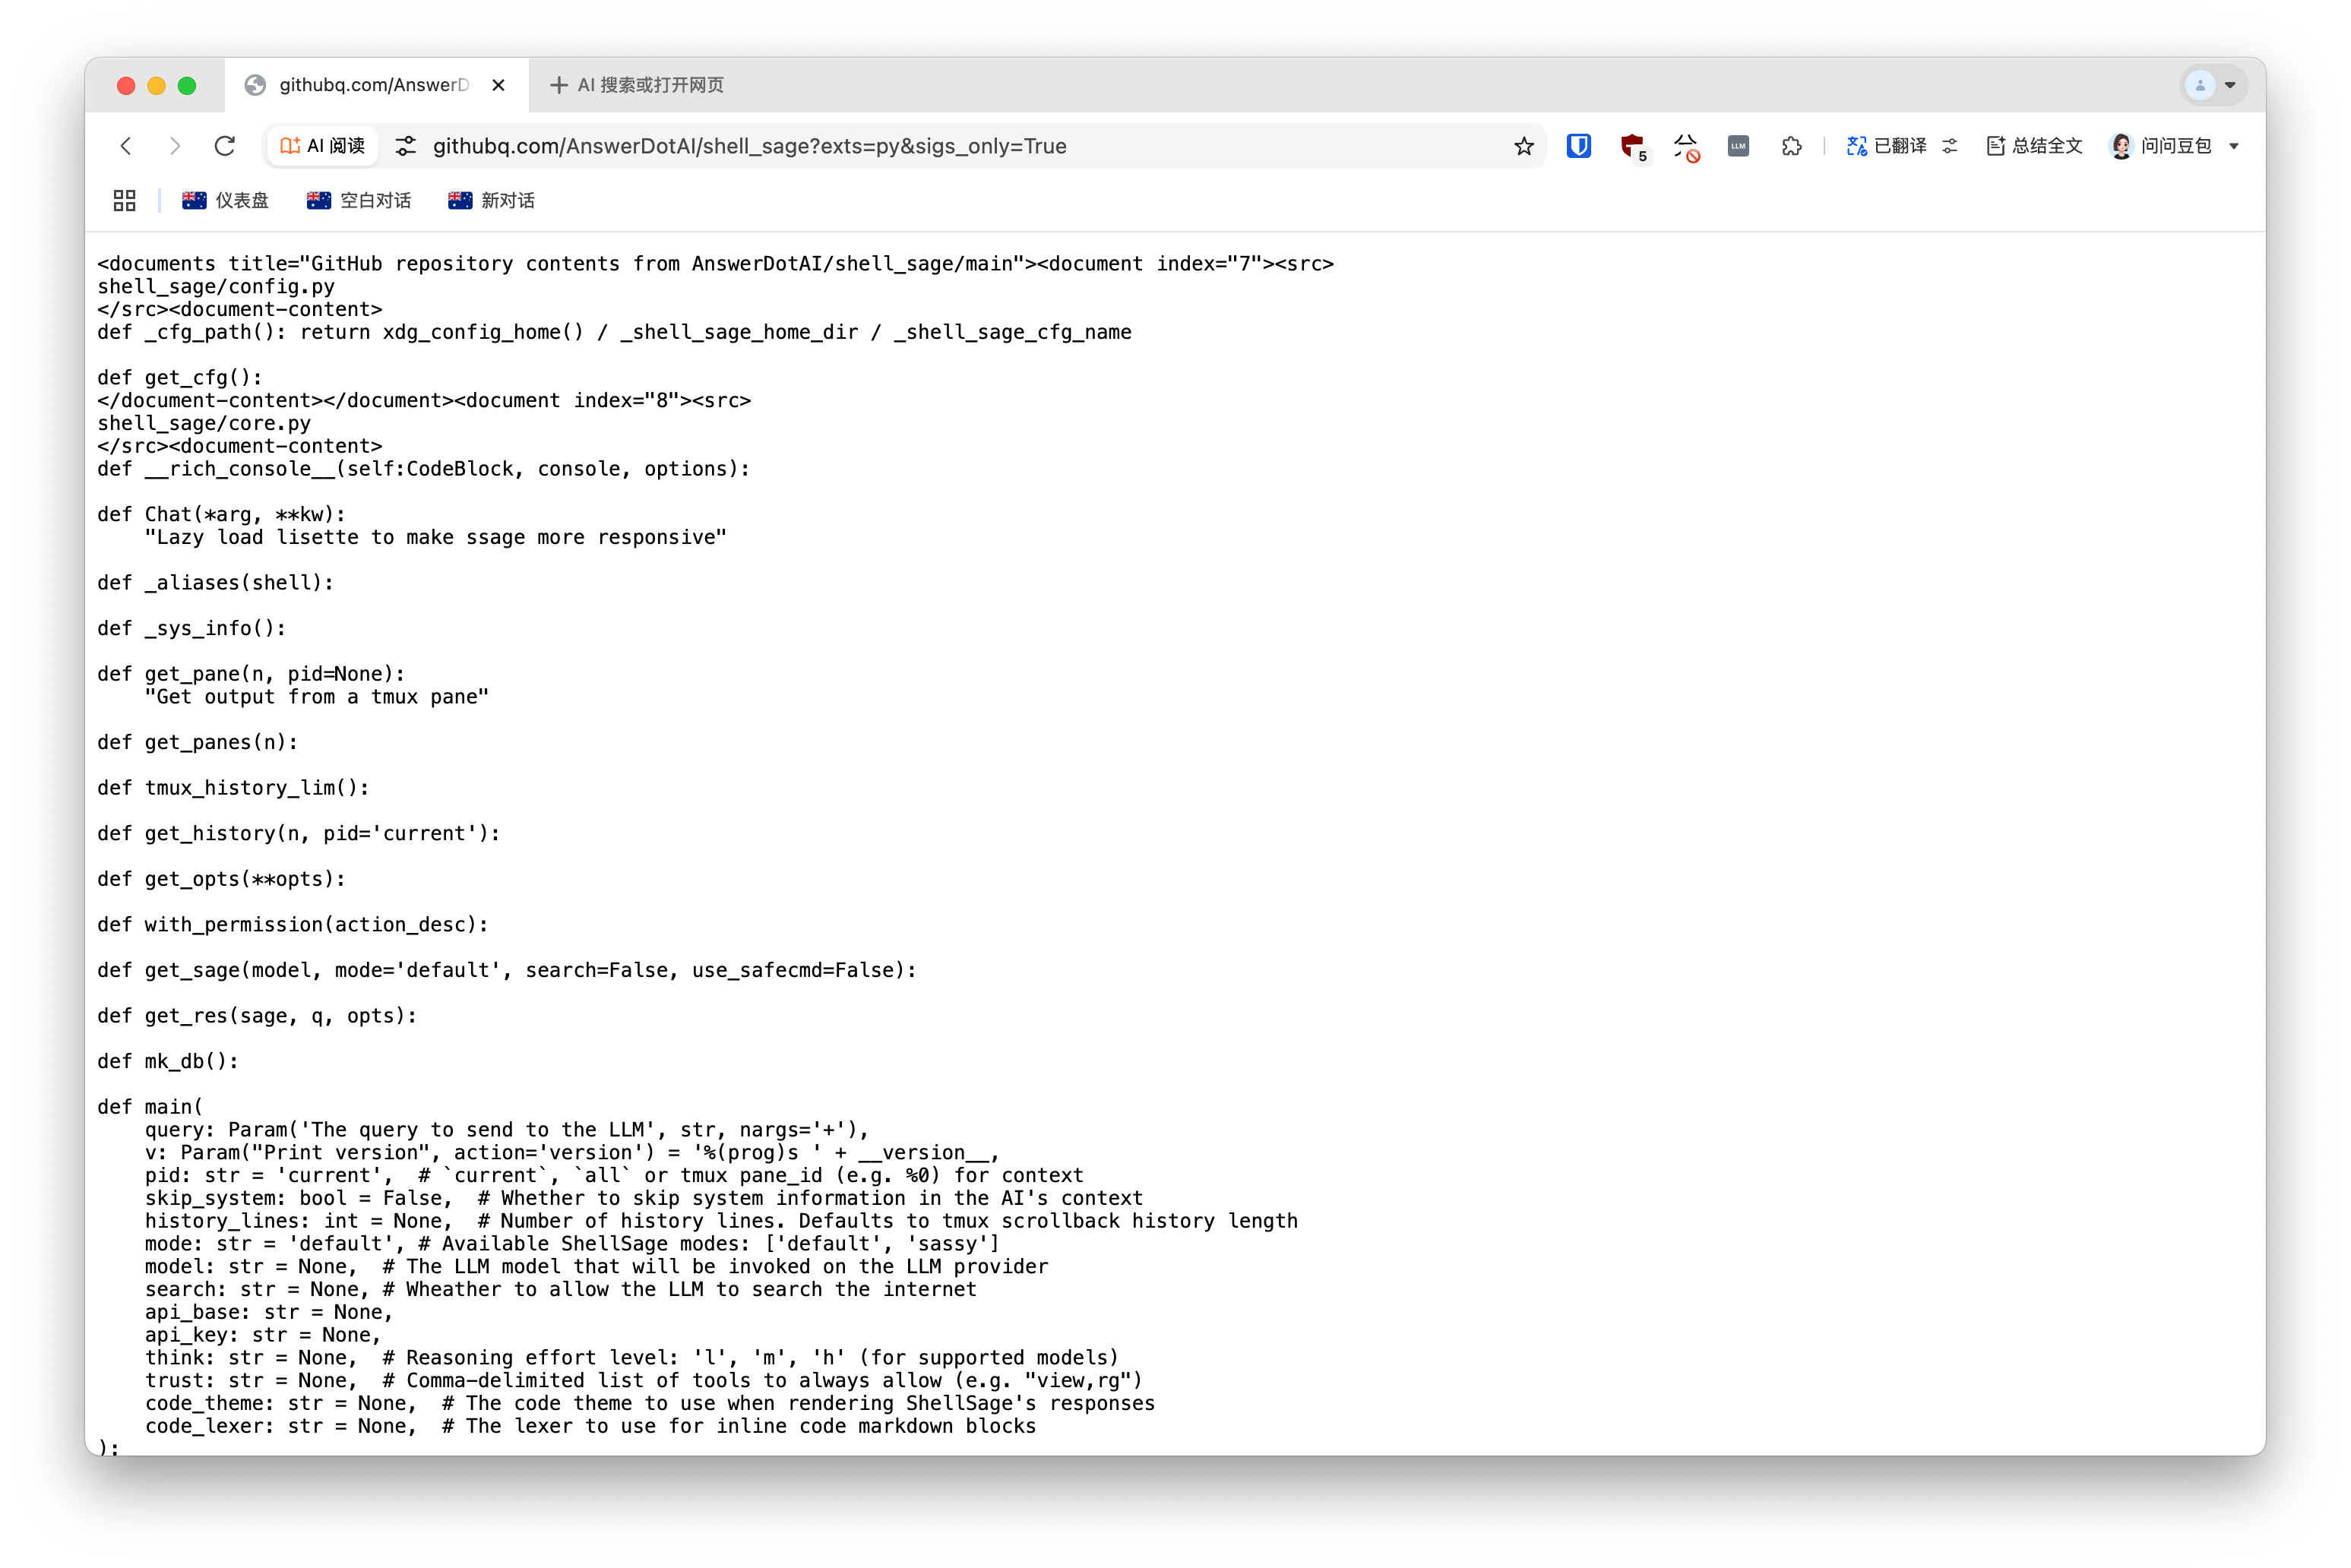
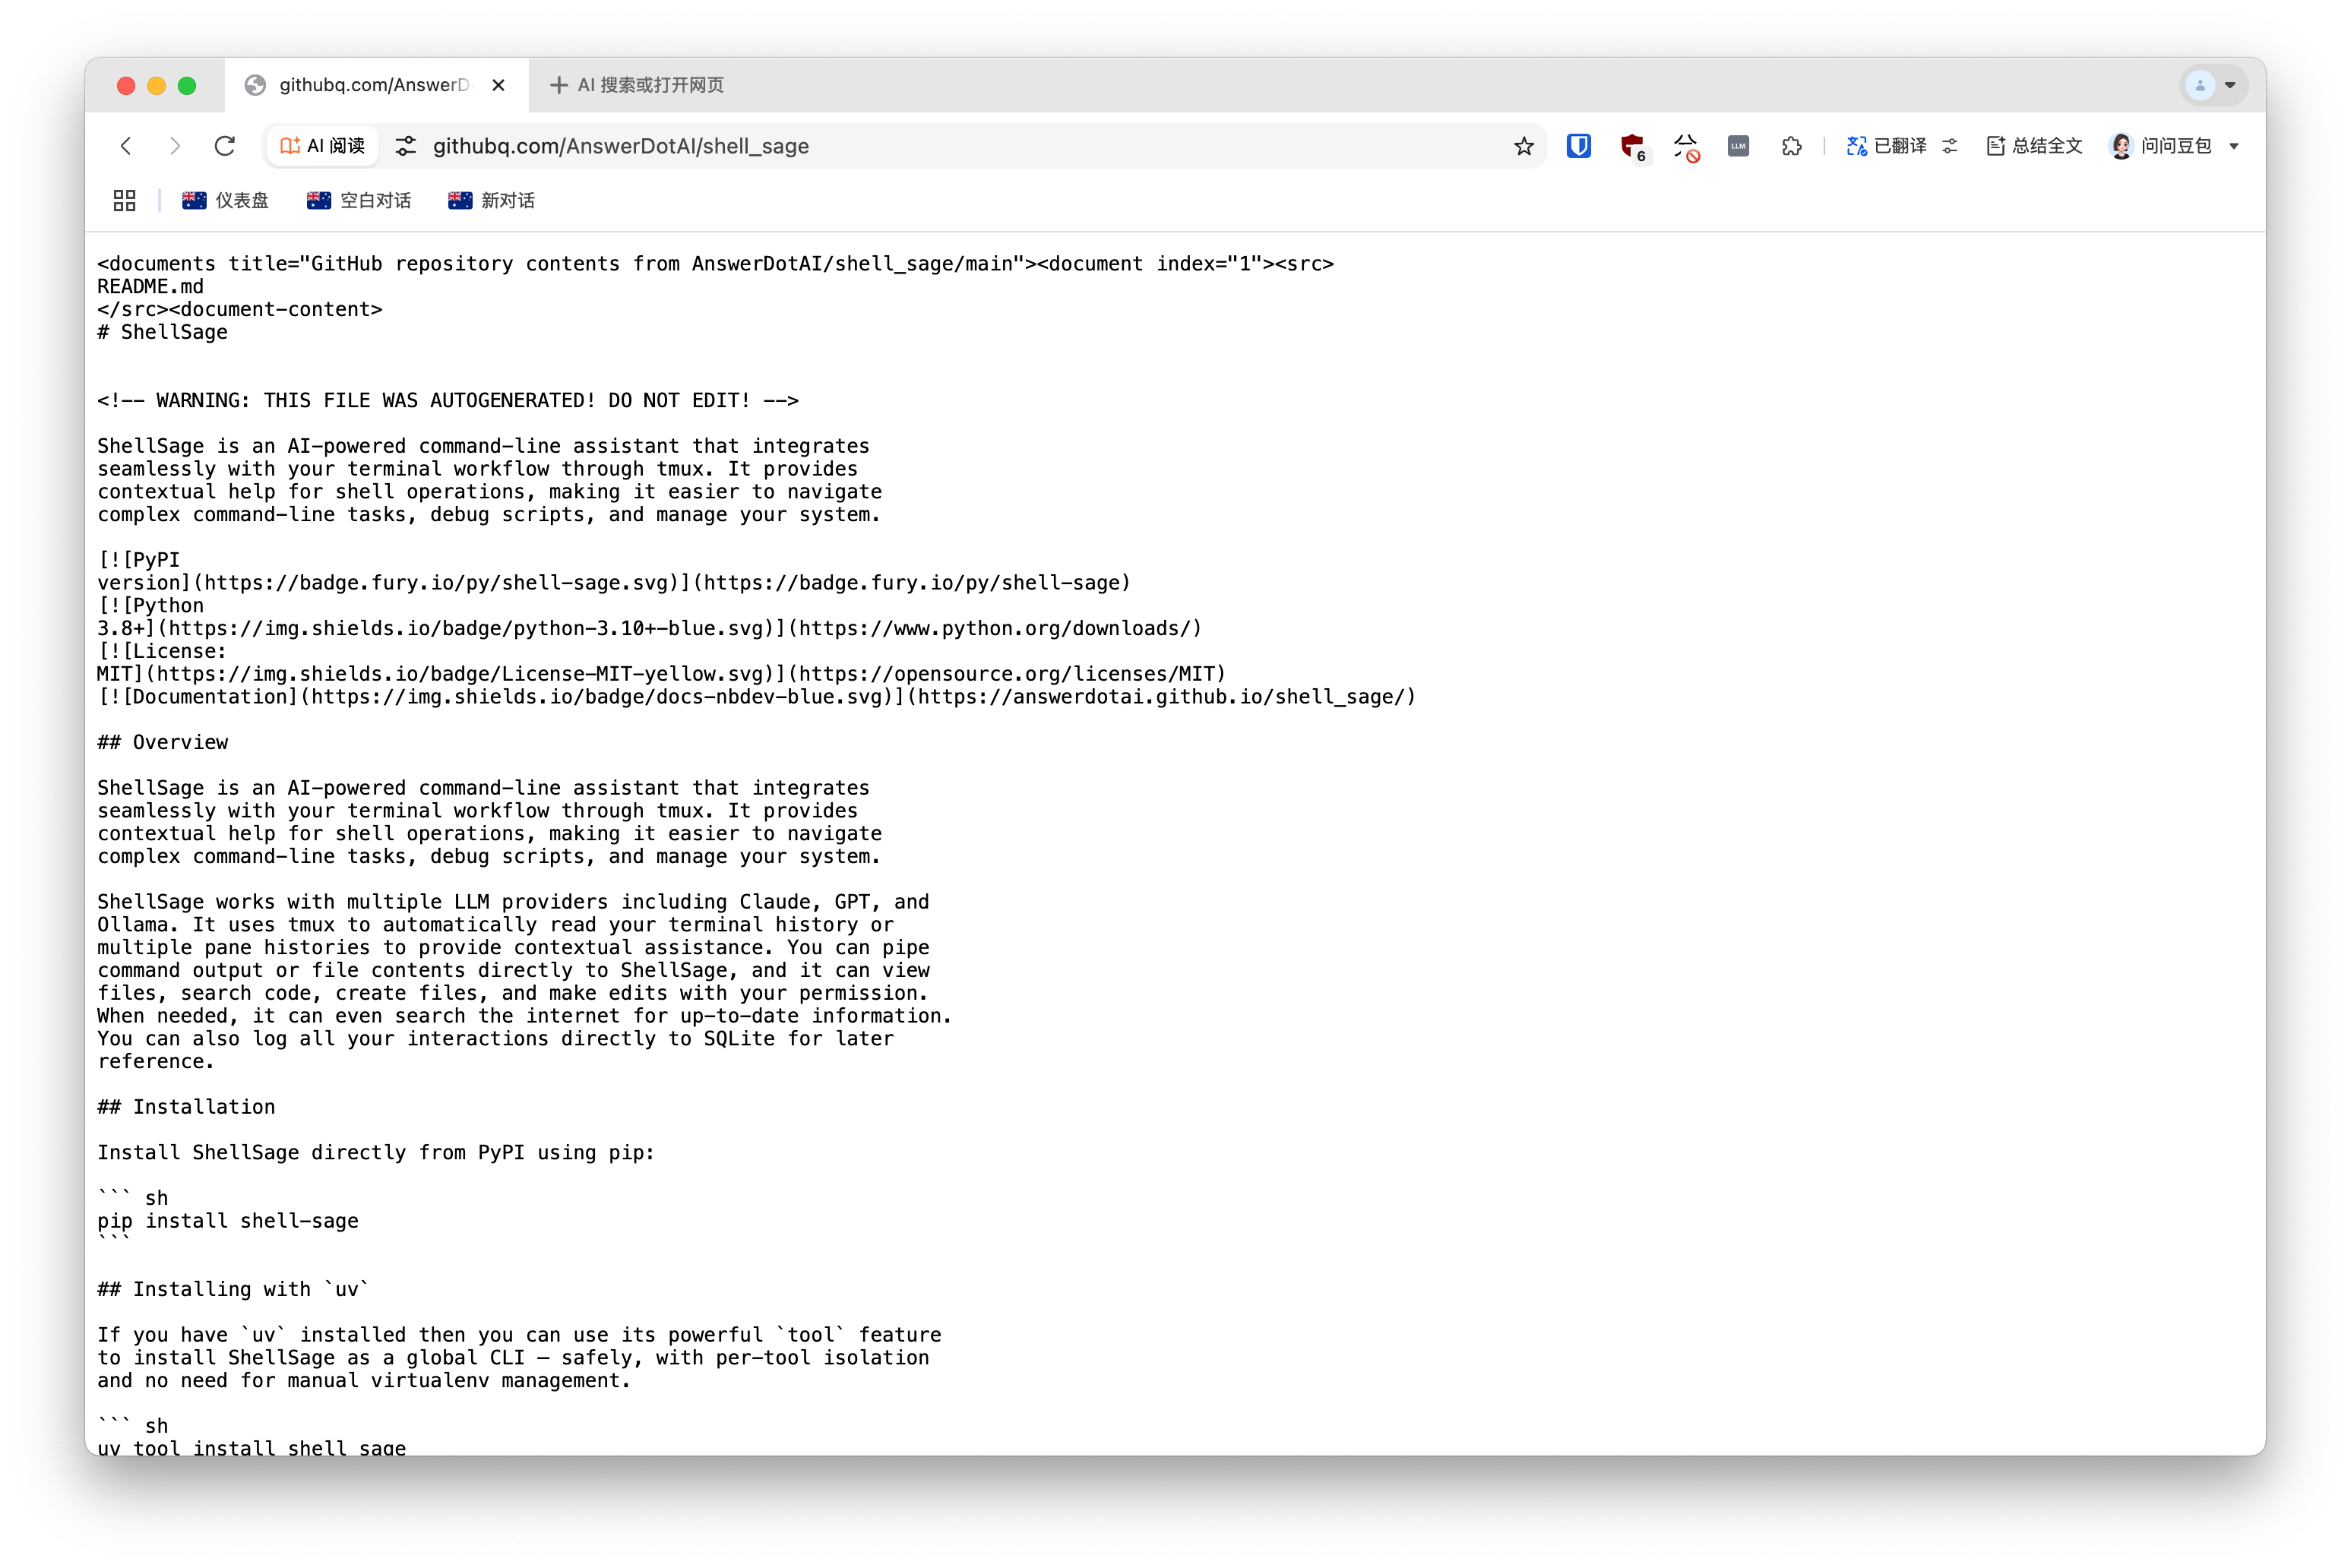

## `toolslm.xml`

### `repo2ctx`

Githubq is great if you want to paste a link to a LLM that will then retrieve what's on the link, or if you want to save one-off files here and there. What if you want to programmatically work with the context? That's where `toolslm`, and more specifically the `toolslm.xml` module comes in.

In [ ]:
from toolslm.xml import repo2ctx
print(repo2ctx('https://github.com/AnswerDotAI/shell_sage', exts='py')[:100])

<documents title="GitHub repository contents from AnswerDotAI/shell_sage/main (filters applied -- ex


Behind the scenes, GitHubq uses `repo2ctx`. So parameters from `repo2ctx` should work as query parameters when accessing `GitHubq`.

In [ ]:
?repo2ctx

```python
def repo2ctx(
    owner:str, # GitHub repo owner or "owner/repo" or a full github URL
    repo:str=None, # GitHub repo name (leave empty if using "owner/repo" or URL format for owner param)
    ref:str=None, # Git ref (branch/tag/sha) (get from URL not provided); defaults to repo's default branch
    folder:str=None, # Only include files under this path (get from URL not provided)
    show_filters:bool=True, # Include filter info in title?
    token:str=None, # GitHub token (uses GITHUB_TOKEN env var if None)
    prefix:bool=False, # Include Anthropic's suggested prose intro?
    out:bool=True, # Include notebook cell outputs?
    include_base:bool=True, # Include full path in src?
    title:str=None, # Optional title attr for Documents element
    max_size:int=100000, # Skip files larger than this (bytes)
    max_total:int=10000000, # Max total output size in bytes
    readme_first:bool=False, # Prioritize README files at start of context?
    files_only:bool=False, # Return dict of {filename: size} instead of context?
    sigs_only:bool=False, # Return signatures instead of full text for python files?
    ids:bool=True, # Include cell ids in notebooks?
    recursive:bool=True, # search subfolders
    symlinks:bool=True, # follow symlinks?
    file_glob:str=None, # Only include files matching glob
    file_re:str=None, # Only include files matching regex
    folder_re:str=None, # Only enter folders matching regex
    skip_file_glob:str=None, # Skip files matching glob
    skip_file_re:str=None, # Skip files matching regex
    skip_folder_re:str=None, # Skip folders matching regex,
    ret_folders:bool=False, # return folders, not just files
    sort:bool=True, # sort files by name within each folder
    types:str \| list=None, # list or comma-separated str of ext types from: py, js, java, c, cpp, rb, r, ex, sh, web, doc, cfg
    exts:str \| list=None, # list or comma-separated str of exts to include
)->Union: # XML for LM context, or dict of file sizes

```



```
Convert GitHub repo to XML context without cloning
```



**File:** `~/.local/lib/python3.12/site-packages/toolslm/xml.py`

**Type:** function

In [ ]:
!ls 

```python
def folder2ctx(
    path:Union, # Folder to read
    prefix:bool=False, # Include Anthropic's suggested prose intro?
    out:bool=True, # Include notebook cell outputs?
    include_base:bool=True, # Include full path in src?
    title:str=None, # Optional title attr for Documents element
    max_size:int=100000, # Skip files larger than this (bytes)
    max_total:int=10000000, # Max total output size in bytes
    readme_first:bool=False, # Prioritize README files at start of context?
    files_only:bool=False, # Return dict of {filename: size} instead of context?
    sigs_only:bool=False, # Return signatures instead of full text for python files?
    ids:bool=True, # Include cell ids in notebooks?
    recursive:bool=True, # search subfolders
    symlinks:bool=True, # follow symlinks?
    file_glob:str=None, # Only include files matching glob
    file_re:str=None, # Only include files matching regex
    folder_re:str=None, # Only enter folders matching regex
    skip_file_glob:str=None, # Skip files matching glob
    skip_file_re:str=None, # Skip files matching regex
    skip_folder_re:str=None, # Skip folders matching regex,
    ret_folders:bool=False, # return folders, not just files
    sort:bool=True, # sort files by name within each folder
    types:str \| list=None, # list or comma-separated str of ext types from: py, js, java, c, cpp, rb, r, ex, sh, web, doc, cfg
    exts:str \| list=None, # list or comma-separated str of exts to include
)->Union:

```



```
Convert folder contents to XML context, handling notebooks
```



**File:** `~/.local/lib/python3.12/site-packages/toolslm/xml.py`

**Type:** function

### `folder2ctx`

Now this is great for remote repositories. If you have a local folder, you can turn that into context with `folder2ctx`.

In [ ]:
!ls

'00-09 系统'   70ec03a05ceeffe770a8d00297fa241a   solveit_settings.json
'20-29 大学'   jobs.csv				  test
'30–39 学习'   shell_sage			  暂时对话


In [ ]:
from toolslm.xml import folder2ctx
print(folder2ctx('shell_sage', exts='py')[:250])

<documents><document index="1"><src>
shell_sage/setup.py
</src><document-content>
from pkg_resources import parse_version
from configparser import ConfigParser
import setuptools, shlex
assert parse_version(setuptools.__version__)>=parse_version('36.2


### `py2sigs`

`py2sigs` can let us directly get function signature from a given Python file.

In [ ]:
from toolslm.xml import py2sigs
print(py2sigs('shell_sage/shell_sage/core.py')[:250])

def __rich_console__(self:CodeBlock, console, options):

def Chat(*arg, **kw):
    "Lazy load lisette to make ssage more responsive"

def _aliases(shell):

def _sys_info():

def get_pane(n, pid=None):
    "Get output from a tmux pane"

def get_panes(


### `sym2pkgctx`

If you have a package already installed, you can use `toolslm`'s `sym2pkgctx` to pull that package in as context. The entire root package is returned.

In [ ]:
print(sym2pkgctx(sc.ShellSageConfig)[:250])

<documents><document index="1"><src>
/usr/local/lib/python3.12/site-packages/shell_sage/__init__.py
</src><document-content>
__version__ = "1.0.4"
</document-content></document><document index="2"><src>
/usr/local/lib/python3.12/site-packages/shell_s


### `sym2folderctx`

`sym2folderctx` is similar to `sym2pkgctx`. However, the difference is that the former returns the returns the context of the folder where the symbol is defined.

In [ ]:
from toolslm.xml import sym2folderctx
print(sym2folderctx(sc.ShellSageConfig)[:250])

<documents><document index="1"><src>
/usr/local/lib/python3.12/site-packages/shell_sage/__init__.py
</src><document-content>
__version__ = "1.0.4"
</document-content></document><document index="2"><src>
/usr/local/lib/python3.12/site-packages/shell_s


In [ ]:
?sym2pkgctx

```python
def sym2pkgctx(
    sym,
    types:str \| list='py', # list or comma-separated str of ext types from: py, js, java, c, cpp, rb, r, ex, sh, web, doc, cfg
    skip_file_re:str='^_mod', prefix:bool=False, # Include Anthropic's suggested prose intro?
    out:bool=True, # Include notebook cell outputs?
    include_base:bool=True, # Include full path in src?
    title:str=None, # Optional title attr for Documents element
    max_size:int=100000, # Skip files larger than this (bytes)
    max_total:int=10000000, # Max total output size in bytes
    readme_first:bool=False, # Prioritize README files at start of context?
    files_only:bool=False, # Return dict of {filename: size} instead of context?
    sigs_only:bool=False, # Return signatures instead of full text for python files?
    ids:bool=True, # Include cell ids in notebooks?
    recursive:bool=True, # search subfolders
    symlinks:bool=True, # follow symlinks?
    file_glob:str=None, # Only include files matching glob
    file_re:str=None, # Only include files matching regex
    folder_re:str=None, # Only enter folders matching regex
    skip_file_glob:str=None, # Skip files matching glob
    skip_folder_re:str=None, # Skip folders matching regex,
    ret_folders:bool=False, # return folders, not just files
    sort:bool=True, # sort files by name within each folder
    exts:str \| list=None, # list or comma-separated str of exts to include
):

```



```
Return repo context for a symbol's root package
```



**File:** `~/.local/lib/python3.12/site-packages/toolslm/xml.py`

**Type:** function

## `contextkit`

Next up is `contextkit`'s `read` module. However, this approach is much more hands on as the module's functions do not return XML formatted contents. Though this does allow you to perform your own processing/handling. You will need to have a SSH key set up between your machine and GitHub as the functions in `read` create temporary clones of the GitHub repo.

`contextkit.read`s `read_gh_repo` returns a dictionary in the format of `{'path': 'contents'}`.

In [ ]:
import contextkit.read as rd
rd.read_gh_repo('https://github.com/AnswerDotAI/shell_sage').keys()

dict_keys(['/app/data/.cache/contextkit_git_clones/shell_sage/settings.ini', '/app/data/.cache/contextkit_git_clones/shell_sage/CONTRIBUTING.md', '/app/data/.cache/contextkit_git_clones/shell_sage/LICENSE', '/app/data/.cache/contextkit_git_clones/shell_sage/README.md', '/app/data/.cache/contextkit_git_clones/shell_sage/pyproject.toml', '/app/data/.cache/contextkit_git_clones/shell_sage/uv.lock', '/app/data/.cache/contextkit_git_clones/shell_sage/MANIFEST.in', '/app/data/.cache/contextkit_git_clones/shell_sage/setup.py', '/app/data/.cache/contextkit_git_clones/shell_sage/CHANGELOG.md', '/app/data/.cache/contextkit_git_clones/shell_sage/ipython/00-init.py', '/app/data/.cache/contextkit_git_clones/shell_sage/nbs/_quarto.yml', '/app/data/.cache/contextkit_git_clones/shell_sage/nbs/CNAME', '/app/data/.cache/contextkit_git_clones/shell_sage/nbs/sidebar.yml', '/app/data/.cache/contextkit_git_clones/shell_sage/nbs/tmux.conf', '/app/data/.cache/contextkit_git_clones/shell_sage/nbs/01_config.ipy

`read_gh_file` returns the contents of the file as a string.

In [ ]:
rd.read_gh_file('https://github.com/AnswerDotAI/shell_sage/blob/main/shell_sage/core.py')[:250]

"# AUTOGENERATED! DO NOT EDIT! File to edit: ../nbs/00_core.ipynb.\n\n# %% auto 0\n__all__ = ['console', 'print', 'sp', 'ssp', 'default_cfg', 'tools', 'sps', 'log_path', 'Chat', 'get_pane', 'get_panes',\n           'tmux_history_lim', 'get_history', 'get_"

In [ ]:
print(rd.read_gh_file('https://github.com/AnswerDotAI/shell_sage/blob/main/shell_sage/core.py')[:250])

# AUTOGENERATED! DO NOT EDIT! File to edit: ../nbs/00_core.ipynb.

# %% auto 0
__all__ = ['console', 'print', 'sp', 'ssp', 'default_cfg', 'tools', 'sps', 'log_path', 'Chat', 'get_pane', 'get_panes',
           'tmux_history_lim', 'get_history', 'get_


## SolveIt

If you're in SolveIt, you can also change directory and ask the LLM to directly read through a particular directory for you with its builtin tools. Note that you should use `%` rather than `!` so the directory switches in a non-temporary manner.

In [ ]:
%cd shell_sage

/app/data/shell_sage


Can you look through the directory and tell me what are the key functions of the shell sage library?

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠

让我看看这个目录的结构：

<details class='tool-usage-details'>
<summary>view(path=.)</summary>

```json
{
  "id": "toolu_01TcJme7ugD8Xzq3rBZLjinR",
  "call": {
    "function": "view",
    "arguments": {
      "path": "."
    }
  },
  "result": "'Directory contents of /app/<TRUNCATED>"
}
```

</details>

主要代码在 `shell_sage/` 文件夹里。让我看看 `core.py` 的签名：

<details class='tool-usage-details'>
<summary>view(path=shell_sage/core.py, view_range=[1, 50])</summary>

```json
{
  "id": "toolu_01N9i48X1GWBFrBj9awo8qzk",
  "call": {
    "function": "view",
    "arguments": {
      "path": "shell_sage/core.py",
      "view_range": "[1, 50]"
    }
  },
  "result": "'# AUTOGENERATED! DO NOT EDIT! File to edit: ../nbs/00_core.ipynb.\\n\\n# %% auto 0\\n__all__ = [\\'console\\', \\'print\\', \\'sp\\', \\'ssp\\', \\'default_cfg\\', \\'tools\\', \\'sps\\', \\'log_path\\', \\'Chat\\', \\'get_pane\\', \\'get_panes\\',\\n           \\'tmux_history_lim\\', \\'get_history\\', \\'get_opts\\', \\'with_permission\\', \\'get_sage\\', \\'get_res\\', \\'Log\\', \\'mk_db\\',\\n           \\'main\\', \\'extract_cf\\', \\'extract\\']\\n\\n# %% ../nbs/00_core.ipynb 3\\nfrom datetime import datetime\\nfrom itertools import accumulate\\nfrom fastcore.script import *\\nfrom fastcore.tools import *\\nfrom fastcore.utils import *\\nfro<TRUNCATED>"
}
```

</details>

---

**Shell Sage 的主要功能：**

根据 `__all__` 导出列表，关键函数包括：

| 函数 | 用途 |
|------|------|
| `main` | 主入口点（CLI 命令 `ssage`）|
| `get_pane`, `get_panes` | 获取 tmux 窗格信息 |
| `get_history` | 获取 tmux 历史记录 |
| `get_sage` | 获取 AI 响应 |
| `Chat` | 延迟加载 LLM 聊天功能 |
| `Log`, `mk_db` | 日志和数据库功能 |
| `extract`, `extract_cf` | 从响应中提取代码 |

简单说：**Shell Sage 是一个 AI 命令行助手，它能读取你的 tmux 终端历史，然后用 LLM 帮你解决 shell 问题。**

You can of course also directly paste in a URL and the LLM will look through it.

What's this GitHub repo about?
https://github.com/AnswerDotAI/shell_sage

##### 🤖Reply🤖<!-- SOLVEIT_SEPARATOR_7f3a9b2c -->

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠



<details class='tool-usage-details'>
<summary>read_url(url=https://github.com/AnswerDotAI/shell_sage)</summary>

```json
{
  "id": "toolu_011DD4XT7Yge4mwqi49s3u6Z",
  "call": {
    "function": "read_url",
    "arguments": {
      "url": "https://github.com/AnswerDotAI/shell_sage"
    }
  },
  "result": "'# AnswerDotAI/shell_sage\\nShellSage saves sysadmins\u2019 sanity by solving shell script snafus super swiftly\\n\\n## / Files\\n- \ud83d\udcc1 .github\\n- .gitignore\\n- CHANGELOG.md\\n- CONTRIBUTING.md\\n- LICENSE\\n- MANIFEST.in\\n- README.md\\n- \ud83d\udcc1 debug\\n- \ud83d\udcc1 ipython\\n- \ud83d\udcc1 nbs\\n- pyproject.toml\\n- \ud83d\udcc1 screenshots\\n- settings.ini\\n- setup.py\\n- \ud83d\udcc1 shell_sage\\n- uv.lock\\n\\n## README\\n# ShellSage\\n\\n\\n<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->\\n\\nShellSage is an AI-powered command-line assistant that integrates\\nseamlessly with your terminal workflow through tmux. It provides\\ncontextual help for shell ope<TRUNCATED>"
}
```

</details>

**Shell Sage** 是一个 AI 驱动的命令行助手，通过 tmux 集成到你的终端工作流中。

**主要特点：**
- 用 `ssage` 命令在终端里问问题
- 能自动读取 tmux 历史记录来提供上下文帮助
- 支持多种 LLM 提供商（Claude、GPT、Ollama 等）
- 可以分析管道输入（piped input）
- 有个有趣的 "sassy mode"（GLaDOS 风格的回复）

**安装：**
```bash
pip install shell-sage
```

## At an Overview

| Method | Input | Best For |
|--------|-------|----------|
| **`githubq`** | Change URL to githubq.com | Quick browser-based access |
| **`repo2ctx`** | GitHub URL | Programmatic access to remote repos |
| **`folder2ctx`** | Local path | Processing local folders |
| **`py2sigs`** | Python file path | Single file signatures |
| **`contextkit.read_gh_repo`** | GitHub URL | Raw dict of full repo contents |
| **`contextkit.read_gh_file`** | File URL | Single file contents |
| **`sym2pkgctx`** | Class/function object | Installed packages |
| **`sym2folderctx`** | Class/function object | Folder containing a symbol |
| **`read_url`** (SolveIt) | GitHub URL | Quick repo overview + README |

## Other `toolslm.xml` Goodies

Beyond the functions we've covered, `toolslm.xml` has other interesting functions:

**Additional Functions:**
- `files2ctx` — Pass in a specific list of files rather than an entire folder
- `nb2xml` — Convert Jupyter notebooks to XML format
- `json_to_xml` — Convert JSON or Python dicts to XML
- `sym2file` — Get the source file contents for any class or function

**Useful Parameters:**
- `prefix=True` — Prepends Anthropic's recommended preamble for document context
- `nums=True` — Adds line numbers to code (handy for referencing specific lines)

**Command Line Support:**
Both `folder2ctx` and `repo2ctx` are available as CLI tools, so you can use them directly from your terminal without writing Python.

There's plenty more to discover. Explore the full module at the [docs](https://answerdotai.github.io/toolslm/xml.html) by pulling it into a LLM with the techniques we've learned here!

## Conclusion

If you have any comments, questions, suggestions, feedback, criticisms, or corrections, please do post them down in the comment section below!